In [1]:
#inverse kinematics simulator made by Belen Septian. You may modify these codes as per your need.
from numpy import*
import matplotlib.pyplot as plt
import math
%matplotlib inline

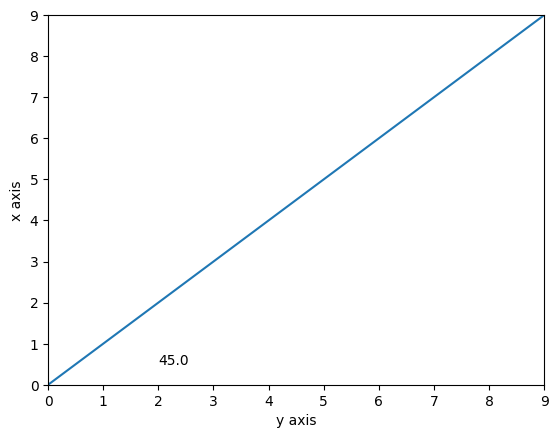

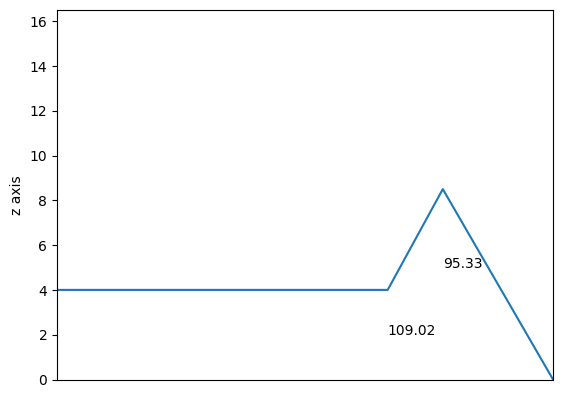

In [15]:
coxa=6;femur=4.5;tibia=6;x_limit=9;y_limit=9;z_limit=4;x_val=9;y_val=9;z_val=4;beta_offset=9;alpha_offset=9

def calculateInverse(x,y,z):
  L1=math.sqrt(math.pow(x,2)+math.pow(y,2))
  gamma=math.degrees(math.atan(x/y))
  L=math.sqrt(math.pow(L1-coxa,2)+math.pow(z,2))
  beta=math.degrees(arccos((math.pow(tibia,2)+math.pow(femur,2)-math.pow(L,2))/(2*tibia*femur)))
  alpha1=math.degrees(arccos(z/L))
  alpha2=math.degrees(arccos((math.pow(femur,2)+math.pow(L,2)-math.pow(tibia,2))/(2*femur*L)))
  alpha_total=alpha1+alpha2
  return gamma, beta, alpha_total

def plotTopView(x,y,z,gamma):
  plt.xlim(0, y_limit)
  plt.ylim(0, x_limit)
  #disable autoscale
  plt.autoscale(False)
  plt.plot([0,y],[0,x])
  plt.text(2,0.5, round(gamma, 2))
  plt.xlabel('y axis')
  plt.ylabel('x axis')
  plt.show()

def plotFrontView(x,y,z,beta,alpha):
  gamma_o, beta_o, alpha_o = calculateInverse(x_limit,y_limit,z_limit)
  move_beta=(beta_o-beta)/beta_offset
  move_alpha=abs((alpha_o-alpha)/alpha_offset)
  plt.xlim(0, y_limit)
  plt.ylim(0, coxa+femur+tibia)
  #disable autoscale
  plt.autoscale(False)
  plt.plot([0,coxa,coxa+1-(move_alpha),y_limit-(move_beta)],[z,z,z+femur,0])
  plt.xticks([])
  plt.text(7,5, round(beta, 2))
  plt.text(6,2, round(alpha, 2))
  plt.ylabel('z axis')
  plt.show()

def main():
  gamma, beta, alpha_total = calculateInverse(x_val,y_val,z_val)
  plotTopView(x_val,y_val,z_val,gamma)
  plotFrontView(x_val,y_val,z_val,beta,alpha_total)

main()
